In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [263]:
df=pd.read_excel('E:/MSc FINTECH/Artificial Intelligence and Machine Learning/AIML Final file.xlsx')
df.head()

,Date,PFTEAAU LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,ALPCRDA LX Equity,UBSFLBI LX Equity
0,4/17/2020,132.46,2.5766,1275.83,10.69,10.76,116.33,146.37
1,4/24/2020,132.46,2.5808,1276.46,10.69,10.77,117.05,146.42
2,2020-01-05 00:00:00,132.19,2.5811,1276.78,10.68,10.77,116.80,146.87
3,2020-08-05 00:00:00,132.19,2.5871,1278.59,10.71,10.77,116.74,147.04
4,5/15/2020,132.19,2.5927,1279.82,10.68,10.78,117.38,146.93


In [264]:
df.reset_index(drop=True, inplace=True)
Data=pd.DataFrame(df)
datetime_series = pd.to_datetime(df['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df=df.set_index(datetime_index)
df.drop('Date',axis=1,inplace=True)

In [265]:
# Log of percentage change of all stocks in the list
Ret= df.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFTEAAU LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,ALPCRDA LX Equity,UBSFLBI LX Equity
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-24,0.00000,0.001629,0.000494,0.000000,0.000929,0.006170,0.000342
2020-01-05,-0.00204,0.000116,0.000251,-0.000936,0.000000,-0.002138,0.003069
2020-08-05,0.00000,0.002322,0.001417,0.002805,0.000000,-0.000514,0.001157
2020-05-15,0.00000,0.002162,0.000962,-0.002805,0.000928,0.005467,-0.000748


In [266]:
Ann_Ret = Ret.mean()*52
print (Ann_Ret)

PFTEAAU LX Equity    0.155346
CCASORI MK Equity    0.077905
BBFTOP3 KY Equity    0.059322
CRLCBUU LX Equity    0.047072
BCUSDLF KK Equity    0.007076
ALPCRDA LX Equity    0.091994
UBSFLBI LX Equity    0.022493
dtype: float64


In [267]:
Ann_Risk=Ret.std()*(52)**(0.5)
print(Ann_Risk)

PFTEAAU LX Equity    0.053876
CCASORI MK Equity    0.016388
BBFTOP3 KY Equity    0.011316
CRLCBUU LX Equity    0.017065
BCUSDLF KK Equity    0.002373
ALPCRDA LX Equity    0.027841
UBSFLBI LX Equity    0.013572
dtype: float64


In [268]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

PFTEAAU LX Equity    0.121749
CCASORI MK Equity    0.038140
BBFTOP3 KY Equity    0.040926
CRLCBUU LX Equity    0.022385
BCUSDLF KK Equity    0.002768
ALPCRDA LX Equity    0.019602
UBSFLBI LX Equity    0.004839
dtype: float64

In [269]:
Ret_Covar = Ret.cov()
#print(Ret_Covar)

In [270]:
Ret_Corr = Ret.corr()
#print(Ret_Corr)

In [271]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix

In [272]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFTEAAU LX Equity    2.883400
CCASORI MK Equity    4.753824
BBFTOP3 KY Equity    5.242223
CRLCBUU LX Equity    2.758347
BCUSDLF KK Equity    2.982097
ALPCRDA LX Equity    3.304219
UBSFLBI LX Equity    1.657342
dtype: float64


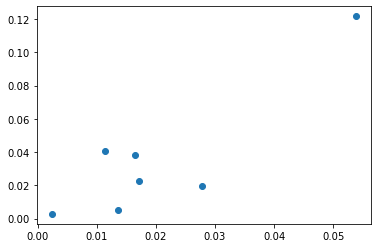

In [273]:
x=Ann_Risk
y=ind_er
plt.scatter(x,y)
plt.show()

In [274]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFTEAAU LX Equity,0.155346,0.053876,2.883400
CCASORI MK Equity,0.077905,0.016388,4.753824
BBFTOP3 KY Equity,0.059322,0.011316,5.242223
CRLCBUU LX Equity,0.047072,0.017065,2.758347
BCUSDLF KK Equity,0.007076,0.002373,2.982097
ALPCRDA LX Equity,0.091994,0.027841,3.304219
UBSFLBI LX Equity,0.022493,0.013572,1.657342


<AxesSubplot:>

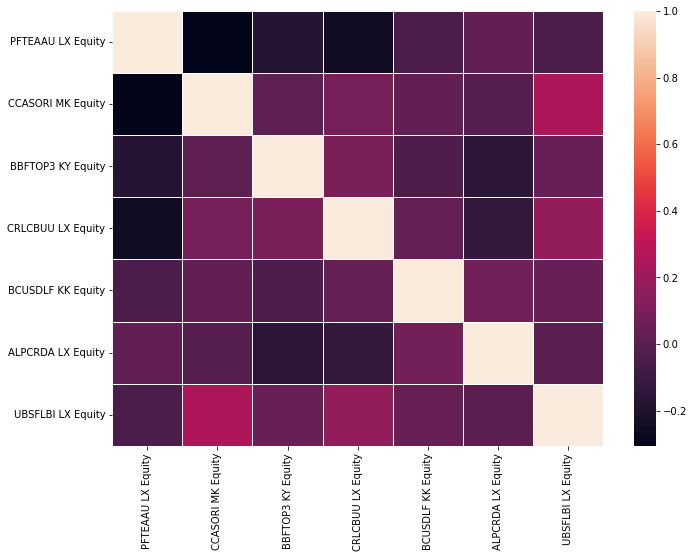

In [275]:
plt.subplots(figsize=(11, 8))
sb.heatmap(Ret_Corr, linewidths=.5, )

In [276]:
w = [0.142857]*7
w= {'PFTEAAU LX Equity':0.142857, 'CCASORI MK Equity':0.142857, 'BBFTOP3 KY Equity':0.142857, 'CRLCBUU LX Equity':0.142857, 'BCUSDLF KK Equity':0.142857, 'ALPCRDA LX Equity':0.142857, 'PFGLAAU LX Equity':0.142857} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)

1.217419703109322e-06
6.330582456168475e-05


In [277]:
Ann_port_std


0.007956495746349945

In [278]:
w = [0.142857]*7
port_er = (w*Ann_Ret).sum()
port_er

0.06588673574444312

In [279]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000

In [280]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [281]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 #print(counter, symbol)
 data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,PFTEAAU LX Equity weight,CCASORI MK Equity weight,BBFTOP3 KY Equity weight,CRLCBUU LX Equity weight,BCUSDLF KK Equity weight,ALPCRDA LX Equity weight,UBSFLBI LX Equity weight
0,0.079384,0.012283,0.210601,0.029949,0.244425,0.153595,0.092009,0.228683,0.040739
1,0.057048,0.006162,0.059178,0.209029,0.135648,0.118238,0.266833,0.162903,0.048171
2,0.059884,0.009794,0.094912,0.076058,0.033016,0.106250,0.120665,0.267625,0.301474
3,0.059223,0.009285,0.067710,0.018923,0.126508,0.149532,0.135287,0.294050,0.207989
4,0.053592,0.006355,0.002269,0.205280,0.253617,0.164781,0.203958,0.132029,0.038066


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

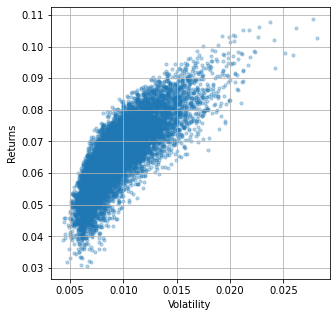

In [282]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [283]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.038962
Volatility                  0.004361
PFTEAAU LX Equity weight    0.057604
CCASORI MK Equity weight    0.088863
BBFTOP3 KY Equity weight    0.297307
CRLCBUU LX Equity weight    0.008616
BCUSDLF KK Equity weight    0.481376
ALPCRDA LX Equity weight    0.002191
UBSFLBI LX Equity weight    0.064042
Name: 9638, dtype: float64

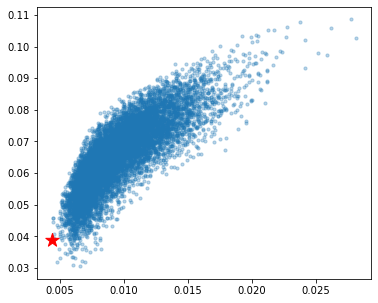

In [284]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [285]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port


Returns                     0.073636
Volatility                  0.007246
PFTEAAU LX Equity weight    0.100347
CCASORI MK Equity weight    0.225993
BBFTOP3 KY Equity weight    0.300716
CRLCBUU LX Equity weight    0.195609
BCUSDLF KK Equity weight    0.005047
ALPCRDA LX Equity weight    0.136460
UBSFLBI LX Equity weight    0.035828
Name: 9505, dtype: float64

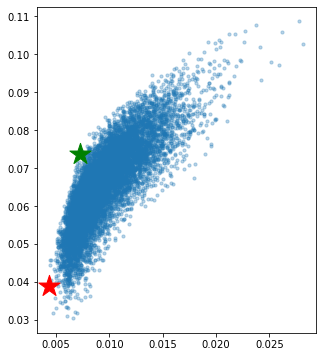

In [286]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)